In [136]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin_bfgs
import matplotlib.pyplot as plt

In [205]:
data = np.loadtxt('ex2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
X.shape

(118, 2)

In [206]:
def mapFeature(X1, X2):
    m = X1.size
    
    degree = 6
    out = np.c_[np.ones(m)]
    
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (X1 ** (i - j) * X2 ** j)
            out = np.c_[out, terms]

    return out

In [207]:
X = mapFeature(X[:, 0], X[:, 1])
X.shape

(118, 28)

In [208]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [204]:
def comp_cost(theta, X, y, lamb):
    h = sigmoid(X.dot(theta))
    J = 1/m * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    
    theta = theta[1:]
    reg = lamb / (2*m) * np.sum(theta ** 2)
    J = J + reg
    return J

In [209]:
def comp_grad(theta, X, y, lamb):
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h-y)
    
    theta = theta[1:]
    grad[1:] = grad[1:] + (lamb/m) * theta
    return grad

In [210]:
m, n = X.shape
initial_theta = np.zeros((n, 1))

In [144]:
def f(theta):
    return comp_cost(theta, X, y, 100).flatten()

In [145]:
def fprime(theta):
    return comp_grad(theta, X, y, 100).flatten()

In [146]:
theta = fmin_bfgs(f, initial_theta, fprime)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


In [147]:
theta = theta.reshape(n, 1)
theta

array([[ 0.02188603],
       [-0.01748169],
       [ 0.00571031],
       [-0.0551694 ],
       [-0.01314888],
       [-0.03859919],
       [-0.01846356],
       [-0.00773236],
       [-0.00892434],
       [-0.02280491],
       [-0.04343876],
       [-0.00235623],
       [-0.01415631],
       [-0.00349509],
       [-0.04143634],
       [-0.02100597],
       [-0.00471924],
       [-0.00359133],
       [-0.00632236],
       [-0.00502443],
       [-0.03197706],
       [-0.03416353],
       [-0.00107628],
       [-0.00702623],
       [-0.00038506],
       [-0.0079824 ],
       [-0.00154778],
       [-0.04108711]])

In [199]:
def plotData(X, y):
    # Visualize Data
    pos = X[np.where(y == 1)].T
    neg = X[np.where(y == 0)].T

    plt.plot(pos[0], pos[1], 'k+', linewidth='2', markersize='7')
    plt.plot(neg[0], neg[1], 'ko', markerfacecolor='y', markersize='7')

In [200]:
def plotDecBoundary(theta, X, y):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = mapFeature(u[i], v[j]).dot(theta)
            
    z = z.T
    plt.contour(u, v, z, [0][0])
            

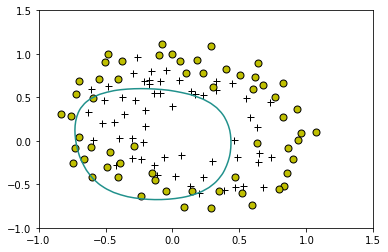

In [201]:
data = pd.read_csv('ex2.txt', header=None)
plotData(X, y)
plotDecBoundary(theta, X, y)

In [158]:
np.where(y == 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57], dtype=int64),)

In [186]:
pos =np.where(y == 1)

In [193]:
X[pos].T[0]

array([ 0.051267 , -0.092742 , -0.21371  , -0.375    , -0.51325  ,
       -0.52477  , -0.39804  , -0.30588  ,  0.016705 ,  0.13191  ,
        0.38537  ,  0.52938  ,  0.63882  ,  0.73675  ,  0.54666  ,
        0.322    ,  0.16647  , -0.046659 , -0.17339  , -0.47869  ,
       -0.60541  , -0.62846  , -0.59389  , -0.42108  , -0.11578  ,
        0.20104  ,  0.46601  ,  0.67339  , -0.13882  , -0.29435  ,
       -0.26555  , -0.16187  , -0.17339  , -0.28283  , -0.36348  ,
       -0.30012  , -0.23675  , -0.06394  ,  0.062788 ,  0.22984  ,
        0.2932   ,  0.48329  ,  0.64459  ,  0.46025  ,  0.6273   ,
        0.57546  ,  0.72523  ,  0.22408  ,  0.44297  ,  0.322    ,
        0.13767  , -0.0063364, -0.092742 , -0.20795  , -0.20795  ,
       -0.43836  , -0.21947  , -0.13882  ])

In [198]:
X[np.where(y == 1)].T[1]

array([ 0.69956 ,  0.68494 ,  0.69225 ,  0.50219 ,  0.46564 ,  0.2098  ,
        0.034357, -0.19225 , -0.40424 , -0.51389 , -0.56506 , -0.5212  ,
       -0.24342 , -0.18494 ,  0.48757 ,  0.5826  ,  0.53874 ,  0.81652 ,
        0.69956 ,  0.63377 ,  0.59722 ,  0.33406 ,  0.005117, -0.27266 ,
       -0.39693 , -0.60161 , -0.53582 , -0.53582 ,  0.54605 ,  0.77997 ,
        0.96272 ,  0.8019  ,  0.64839 ,  0.47295 ,  0.31213 ,  0.027047,
       -0.21418 , -0.18494 , -0.16301 , -0.41155 , -0.2288  , -0.18494 ,
       -0.14108 ,  0.012427,  0.15863 ,  0.26827 ,  0.44371 ,  0.52412 ,
        0.67032 ,  0.69225 ,  0.57529 ,  0.39985 ,  0.55336 ,  0.35599 ,
        0.17325 ,  0.21711 , -0.016813, -0.27266 ])

In [216]:
theta = comp_grad(initial_theta, X, data[:, [2]], 1)
pd.DataFrame(theta)

,0
0,0.008475
1,0.018788
2,0.000078
3,0.050345
4,0.011501
5,0.037665
6,0.018356
7,0.007324
8,0.008192
9,0.023476
